In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## 1. Preparation

#### 1.1.Load data airbnb-bangkok-score.csv.bz2.

In [2]:
airbnb = pd.read_csv("airbnb-bangkok-score.csv.bz2", sep="\t")

#### 1.2. A quick descriptive analysis: how many cases do we have? How many variables do we have? What are the variable names? What are the data types?

In [3]:
print(airbnb.shape)
print(airbnb.dtypes)

(2000, 41)
price                             float64
minimum_nights                      int64
maximum_nights                      int64
instant_bookable                   object
neighbourhood                      object
reviews_per_month                 float64
calculated_host_listings_count      int64
number_of_reviews                   int64
x1                                 object
x2                                 object
x3                                 object
x4                                 object
x5                                 object
x6                                 object
x7                                 object
x8                                 object
x9                                 object
x10                                object
x11                                object
x12                                object
x13                                object
x14                                object
x15                                object
x16                    

There are 2000 cases and 41 variables, the variable names are listed and so are their data types.

#### 1.3. Your outcome variable is highScore. Let’s call it y for consistency. Check what kind of values does it contain.

In [4]:
y = airbnb.highScore

highScore contains a boolean value.

#### 1.4. Create “full” design matrices X for training and validation, those should contain all variables there, except “highScore”.

In [5]:
X = airbnb.loc[:, airbnb.columns != "highScore"]

#### 1.5. Why do we want to remove highScore from the design matrix?

Because highScore is the outcome variable so we don't want to include it in the design matrix, which is used for training.

## 2. Train and validate

#### 2.1.a. Create a smaller design matrix Xj that only contains the first j columns. (See above.)

#### 2.1.b. Convert this matrix to dummies (use pd.get dummies). How many columns are now in your “dummy” design matrix Xd?

#### 2.1.c. Split the dummy-matrix into training and validation parts. Let’s make these chunks equally large here, you can do this along these lines:

#### 2.1.d. Fit the logistic regression on the training chunk. Note: if you get convergence warnings then you can increase the max iterations like

In [6]:
training_acc = []
validation_acc = []
for j in range(1, X.shape[1] + 1):
    Xj = X.iloc[:,:j]
    Xd = pd.get_dummies(Xj)
    print(f"Num Cols: {Xd.shape[1]}")
    Xt, Xv, yt, yv = train_test_split(Xd, airbnb.highScore, test_size=0.5)
    m = LogisticRegression(max_iter = 5000).fit(Xt, yt)
    training_acc.append(m.score(Xt, yt)) # training accuracy
    validation_acc.append(m.score(Xv, yv)) # validation accuracy

Num Cols: 1
Num Cols: 2
Num Cols: 3
Num Cols: 5
Num Cols: 229
Num Cols: 230
Num Cols: 231
Num Cols: 232
Num Cols: 258
Num Cols: 284
Num Cols: 310
Num Cols: 336
Num Cols: 362
Num Cols: 388
Num Cols: 414
Num Cols: 440
Num Cols: 466
Num Cols: 492
Num Cols: 518
Num Cols: 544
Num Cols: 570
Num Cols: 596
Num Cols: 622
Num Cols: 648
Num Cols: 674
Num Cols: 700
Num Cols: 726
Num Cols: 752
Num Cols: 778
Num Cols: 804
Num Cols: 830
Num Cols: 856
Num Cols: 882
Num Cols: 908
Num Cols: 934
Num Cols: 960
Num Cols: 986
Num Cols: 1012
Num Cols: 1013
Num Cols: 1014


#### 2.2. Plot your results: accuracy versus number of columns.

40


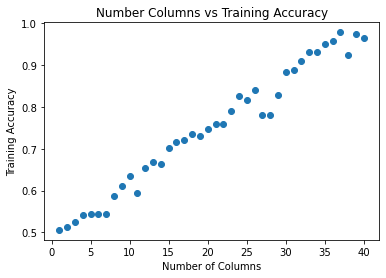

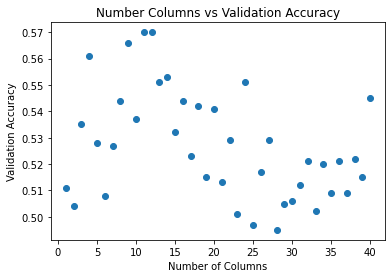

In [9]:
print(len(validation_acc))
num_col = np.arange(1, 41)
plt.scatter(num_col, training_acc)
plt.xlabel("Number of Columns")
plt.ylabel("Training Accuracy")
plt.title(label="Number Columns vs Training Accuracy")
plt.show()
plt.scatter(num_col, validation_acc)
plt.xlabel("Number of Columns")
plt.ylabel("Validation Accuracy")
plt.title(label="Number Columns vs Validation Accuracy")
plt.show()

#### 2.3. Which number of columns will give you the best results? (Based on validation data.)

In [11]:
print(np.argmax(validation_acc))

10


According to the validation data, 10 columns give the best results

I think discord says we only have to do till section 2.